# Visualizing the principal components of a dataset

Let's take some random samples with 2 features.

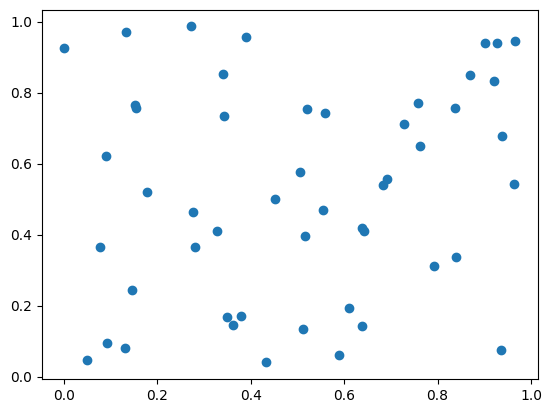

In [23]:
import numpy as np
import matplotlib.pyplot as plt
a= np.random.rand(50,2)
plt.scatter(a[:,0],a[:,1])

Find the covariance matrix of the data.

Find the eigenvalues and eigenvectors of the covariance matrix. Those are the principal components.

In [24]:
a_mean = np.mean(a, axis=0)
cov_matrix = np.cov(a, rowvar=False)
print(cov_matrix)

eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print(eig_vectors)
print(eig_values)

[[0.08454898 0.01605165]
 [0.01605165 0.08931235]]
[[-0.75722171 -0.65315792]
 [ 0.65315792 -0.75722171]]
[0.07070328 0.10315805]


Subtract the mean of each column for all datapoints.
The new origin for the data is its earlier mean.

Now we will have to plot the principal components. For that, let's have an array equally spaced points.

PCs will have direction in the joining (0,0) with its two values. Using y= mx , m = second_component/ first_component.

(-0.5521417862904122,
 0.5162641539270841,
 -0.5985174691975981,
 0.6401112726014536)

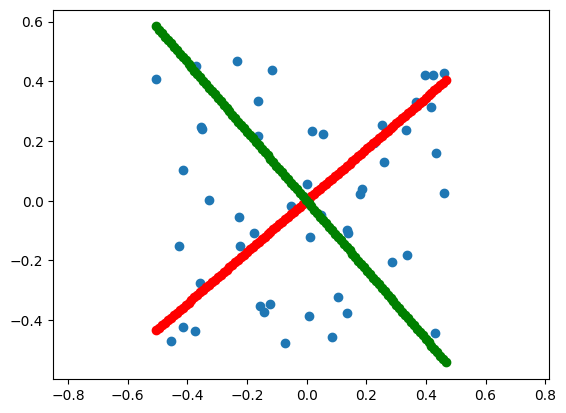

In [25]:
plt.scatter(a[:,0]- np.mean(a[:,0]),a[:,1]-np.mean(a[:,1]))
x_min = min(a[:,0]- np.mean(a[:,0]))
x_max = max(a[:,1]-np.mean(a[:,1]))


x = np.linspace(x_min,x_max, 100)
plt.scatter(x, x*(eig_vectors[0][1]/eig_vectors[0][0]), color = 'red')
plt.scatter(x, x*(eig_vectors[1][1]/eig_vectors[1][0]), color = 'green')
plt.axis('equal')

The projections of the earlier dataset in the new coordinate system of the principal components are calculated using dot product.

The data is now more concentrated along the axis.

(-0.6789422328413532,
 0.7104782366831177,
 -0.6888614590687144,
 0.7182854620610187)

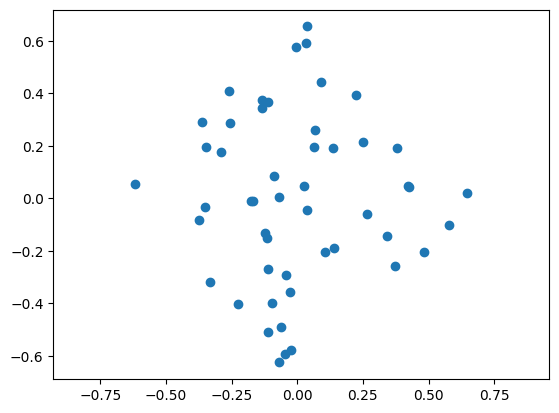

In [26]:
b = np.dot(a-a_mean, eig_vectors)
plt.scatter(b[:,0],b[:,1])
plt.axis('equal')


# On a Dataset

We will import the breast cancer dataset from sklearn.datasets .

Since, it has 30 features, at first , we will fit a logistic regression model using all the features and then we will use only the top 5 principal components and fit another logistic regression model on that transformed data. The results are below :

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

### Checking the data.
This step is not necessary as the data is already present in the form of features and labels.

In [29]:
df = pd.DataFrame(data= data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
df['target']= data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Split the data

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target, test_size=0.2, random_state=5)

### Scale all the columns.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression as logreg
logr = logreg(penalty='l2')
logr.fit(X_train,y_train)
y_pred= logr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9736842105263158


### PCA using SKLearn

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components =5)
new_X_train = pca.fit_transform(X_train)
new_X_test = pca.transform(X_test)

logr2= logreg()
logr2.fit(new_X_train, y_train)
y_pred2= logr2.predict(new_X_test)
print(accuracy_score(y_test,y_pred2))

0.9824561403508771


## Algorithm for PCA

In [35]:
def pca(X, n_components):
    X_mean = np.mean(X, axis=0)  # Calculate mean of the data
    X_centered = X - X_mean    # Centre the data around the mean.
    cov_matrix = np.cov(X, rowvar=False)    # Calaculate covariance matrix of the initial data
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)  # Eigenvalues/vectors of the cov matrix.

    sorted_indices = np.argsort(eig_values)[::-1]   #  Sort the eigenvectors based on eigenvalues.
    sorted_eig_vectors = eig_vectors[:, sorted_indices]

    top_eig_vectors = sorted_eig_vectors[:, :n_components]   # Select the first n eigenvectors.
    X_pca = np.dot(X_centered, top_eig_vectors)    # Transform the data by taking projections.
    return X_pca